In [80]:
# 基本处理 1
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

movies = pd.read_csv('movies_credits.csv')

In [81]:
# 列处理 2

# 没有
movies.drop(columns = ['overview', 'runtime', 'tagline', 'keywords', 
                       'homepage', 'movie_id', 'status'], inplace = True)

movies.drop(columns = ['writer', 'producer'], inplace = True)

movies['release_date'] = pd.to_datetime(movies['release_date'])

# original_table table_x table_y数据重复
movies.rename(columns={'original_title':'movie_title'}, inplace = True)
movies.drop(columns = ['title_x', 'title_y'], inplace = True)

movies['language'] = ''
movies['year'] = ''
movies['month'] = ''
movies['generation'] = ''
movies['main_country'] = ''
movies['main_genre'] = ''
movies['main_company'] = ''


In [82]:
# 针对语言进行分类

i = 0
for l in movies.original_language:
    if l == "en":
        movies.loc[i, 'language'] = 0
    else:
        movies.loc[i, 'language'] = 1
    i += 1

In [83]:
movies.groupby('language').count()

,budget,genres,original_language,movie_title,popularity,production_companies,production_countries,release_date,revenue,vote_average,vote_count,actors,director,year,month,generation,main_country,main_genre,main_company
language,,,,,,,,,,,,,,,,,,,
0,4505,4505,4505,4505,4505,4505,4505,4504,4505,4505,4505,4505,4475,4505,4505,4505,4505,4505,4505
1,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298,298


In [84]:
# 提取上映年份 / 月份

movies.release_date.dropna(inplace = True)
movies['year'] = movies['release_date'].dt.year
movies['month'] = movies['release_date'].dt.month

In [85]:
# 针对年份进行编码

i = 0
for y in movies.year:
    if y <= 1980:
        movies.loc[i, 'generation'] = 1
    elif (y >= 1981) & (y <= 1990):
        movies.loc[i, 'generation'] = 2
    elif (y >= 1991) & (y <= 2000):
        movies.loc[i, 'generation'] = 3
    elif (y >= 2001) & (y <= 2005):
        movies.loc[i, 'generation'] = 4
    elif (y >= 2006) & (y <= 2010):
        movies.loc[i, 'generation'] = 5
    elif (y >= 2011) & (y <= 2016):
        movies.loc[i, 'generation'] = 6
    else:
        movies.loc[i, 'generation'] = 0
    i += 1
    

In [86]:
movies.groupby('generation').count()

,budget,genres,original_language,movie_title,popularity,production_companies,production_countries,release_date,revenue,vote_average,vote_count,actors,director,language,year,month,main_country,main_genre,main_company
generation,,,,,,,,,,,,,,,,,,,
0,2,2,2,2,2,2,2,1,2,2,2,2,1,2,1,1,2,2,2
1,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274,274
2,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285,285
3,915,915,915,915,915,915,915,915,915,915,915,915,913,915,915,915,915,915,915
4,976,976,976,976,976,976,976,976,976,976,976,976,968,976,976,976,976,976,976
5,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1131,1124,1131,1131,1131,1131,1131,1131
6,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1208,1220,1220,1220,1220,1220,1220


In [87]:
movies.drop(movies[movies.revenue == 0].index, inplace = True)

In [88]:
movies.dropna(axis = 0, inplace = True)

In [89]:
# movies.describe(include = object)
movies.describe().T

,count,mean,std,min,25%,50%,75%,max
budget,3374.0,3.890462e+07,4.421003e+07,0.000000,8.550000e+06,2.500000e+07,5.200000e+07,3.800000e+08
popularity,3374.0,2.827716e+01,3.562634e+01,0.019984,9.970888e+00,1.976746e+01,3.643038e+01,8.755813e+02
revenue,3374.0,1.170999e+08,1.835159e+08,5.000000,1.537595e+07,5.182193e+07,1.401717e+08,2.787965e+09
vote_average,3374.0,6.309010e+00,8.822266e-01,0.000000,5.800000e+00,6.300000e+00,6.900000e+00,1.000000e+01
vote_count,3374.0,9.449810e+02,1.393070e+03,0.000000,1.610000e+02,4.410000e+02,1.091750e+03,1.375200e+04
language,3374.0,4.238293e-02,2.014911e-01,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
year,3374.0,2.001851e+03,1.312246e+01,1916.000000,1.998000e+03,2.005000e+03,2.010000e+03,2.016000e+03
month,3374.0,6.979846e+00,3.357741e+00,1.000000,4.000000e+00,7.000000e+00,1.000000e+01,1.200000e+01
generation,3374.0,4.211025e+00,1.489538e+00,1.000000,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00


In [90]:
# 分语言对budget进行填充
# 除开0算平均值
languages = movies.language.unique()
for l in languages:
    lmean = movies[(movies.language == l) & (movies.budget != 0)].budget.mean()
    lBudget = movies[movies.language == l]
    lBudget.budget.replace(0, lmean, inplace = True)
    movies[movies.language == l] = lBudget

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [91]:
# # 根据popularity排序
# movies.sort_values('popularity', inplace = True)

In [92]:
# # 根据vote_average排序
# movies.sort_values('vote_average', inplace = True, ascending = False)

In [93]:
revenueTop100 = movies.revenue.sort_values(ascending = False).head(100).index
moviesRevenueTop100 = movies.loc[revenueTop100]
moviesRevenueTop100.head()

,budget,genres,original_language,movie_title,popularity,production_companies,production_countries,release_date,revenue,vote_average,vote_count,actors,director,language,year,month,generation,main_country,main_genre,main_company
0,237000000.0,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",en,Avatar,150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2009-12-10,2787965087,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,0,2009.0,12.0,5,,,
25,200000000.0,"['Drama', 'Romance', 'Thriller']",en,Titanic,100.025899,"['Paramount Pictures', 'Twentieth Century Fox ...",['United States of America'],1997-11-18,1845034188,7.5,7562,"['Kate Winslet', 'Leonardo DiCaprio', 'Frances...",James Cameron,0,1997.0,11.0,3,,,
16,220000000.0,"['Science Fiction', 'Action', 'Adventure']",en,The Avengers,144.448633,"['Paramount Pictures', 'Marvel Studios']",['United States of America'],2012-04-25,1519557910,7.4,11776,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",Joss Whedon,0,2012.0,4.0,6,,,
28,150000000.0,"['Action', 'Adventure', 'Science Fiction', 'Th...",en,Jurassic World,418.708552,"['Universal Studios', 'Amblin Entertainment', ...",['United States of America'],2015-06-09,1513528810,6.5,8662,"['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan...",Colin Trevorrow,0,2015.0,6.0,6,,,
44,190000000.0,['Action'],en,Furious 7,102.322217,"['Universal Pictures', 'Original Film', 'Fuji ...","['Japan', 'United States of America']",2015-04-01,1506249360,7.3,4176,"['Vin Diesel', 'Paul Walker', 'Dwayne Johnson'...",James Wan,0,2015.0,4.0,6,,,


In [94]:
movies.drop(movies[movies.production_companies == '[]'].index, inplace = True)
movies.drop(movies[movies.production_countries == '[]'].index, inplace = True)
movies.drop(movies[movies.actors == '[]'].index, inplace = True)

In [95]:
# main country

for i in movies.production_countries.index:
    c = movies.loc[i, 'production_countries'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_country'] = c.split(' ')[0]

In [96]:
# main genres

for i in movies.genres.index:
    c = movies.loc[i, 'genres'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_genre'] = c.split(' ')[0]

In [97]:
# main companies

for i in movies.production_companies.index:
    c = movies.loc[i, 'production_companies'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movies.loc[i, 'main_company'] = c.split(' ')[0]

In [98]:
movies.main_genre.unique

<bound method Series.unique of 0                Action
1             Adventure
2                Action
3                Action
4                Action
             ...       
4773             Comedy
4788             Horror
4792              Crime
4796    Science_Fiction
4798             Action
Name: main_genre, Length: 3319, dtype: object>

In [99]:
movies['budget'] = movies['budget'].astype('int64')
movies['year'] = movies['year'].astype('int64')
movies['month'] = movies['month'].astype('int64')

In [100]:
movies.describe()

,budget,popularity,revenue,vote_average,vote_count,language,year,month,generation
count,3.319000e+03,3319.000000,3.319000e+03,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000,3319.000000
mean,4.102961e+07,28.704701,1.189528e+08,6.316842,960.202169,0.041880,2001.830371,6.983127,4.211509
std,4.361910e+07,35.762044,1.844567e+08,0.873812,1399.488608,0.200345,13.193619,3.358931,1.495172
min,1.000000e+00,0.037073,5.000000e+00,0.000000,0.000000,0.000000,1916.000000,1.000000,1.000000
25%,1.200000e+07,10.423582,1.677858e+07,5.800000,177.000000,0.000000,1998.000000,4.000000,3.000000
50%,2.800000e+07,20.230535,5.358740e+07,6.400000,453.000000,0.000000,2005.000000,7.000000,4.000000
75%,5.400000e+07,36.766035,1.416468e+08,6.900000,1112.500000,0.000000,2010.000000,10.000000,5.000000
max,3.800000e+08,875.581305,2.787965e+09,10.000000,13752.000000,1.000000,2016.000000,12.000000,6.000000


In [101]:
movieCompanies = []
for i in movies.production_companies.index:
    s = movies.loc[i, 'production_companies'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movieCompanies.append(s)

companiesCounts = {}

for c in movieCompanies:
    companiesCounts[c] = companiesCounts.get(c,0)+1

companies = list(companiesCounts.items())
companies.sort(key=lambda x:x[1],reverse=True)

for i in range(20):
    c,count = companies[i]
    print("{0:<10}{1:>5}".format(c,count))

Paramount_Pictures   51
Universal_Pictures   35
New_Line_Cinema   29
Columbia_Pictures   28
Warner_Bros   25
Twentieth_Century_Fox_Film_Corporation   25
Metro-Goldwyn-Mayer_(MGM)   25
Walt_Disney_Pictures   19
Touchstone_Pictures   16
Columbia_Pictures_Corporation   13
Dimension_Films   13
DreamWorks_Animation   12
Walt_Disney_Pictures Pixar_Animation_Studios   11
United_Artists   11
Walt_Disney_Pictures Walt_Disney_Feature_Animation    9
Miramax_Films    9
Marvel_Studios    8
Blue_Sky_Studios Twentieth_Century_Fox_Animation    8
Fox_2000_Pictures    8
Eon_Productions    7


In [102]:
movieActor = []
for i in movies.actors.index:
    s = movies.loc[i, 'actors'].replace('[', '').replace(']', '').replace('.', '').replace('\'', '').replace(' ', '_').replace(',_', ' ')
    movieActor.append(s)
    
actorCounts = {}

for a in movieActor:
    actorCounts[a] = actorCounts.get(a,0)+1

actor = list(actorCounts.items())
actor.sort(key=lambda x:x[1],reverse=True)

for i in range(20):
    a,count = actor[i]
    print("{0:<10}{1:>5}".format(a,count))


William_Shatner Leonard_Nimoy DeForest_Kelley James_Doohan    6
Jennifer_Lawrence Josh_Hutcherson Liam_Hemsworth Woody_Harrelson    4
Patrick_Stewart Jonathan_Frakes Brent_Spiner LeVar_Burton    4
Johnny_Depp Orlando_Bloom Keira_Knightley Stellan_Skarsgård    2
Martin_Freeman Ian_McKellen Richard_Armitage Ken_Stott    2
Mike_Myers Eddie_Murphy Cameron_Diaz Julie_Andrews    2
Keanu_Reeves Laurence_Fishburne Carrie-Anne_Moss Hugo_Weaving    2
Chris_Hemsworth Natalie_Portman Tom_Hiddleston Anthony_Hopkins    2
Mel_Gibson Danny_Glover Joe_Pesci Rene_Russo    2
Daniel_Radcliffe Rupert_Grint Emma_Watson Richard_Harris    2
Patrick_Stewart Hugh_Jackman Ian_McKellen Halle_Berry    2
Michael_J_Fox Geena_Davis Hugh_Laurie Jonathan_Lipnicki    2
Ewan_McGregor Natalie_Portman Hayden_Christensen Ian_McDiarmid    2
Elijah_Wood Ian_McKellen Viggo_Mortensen Liv_Tyler    2
Ray_Romano John_Leguizamo Denis_Leary Queen_Latifah    2
Freddie_Prinze_Jr Sarah_Michelle_Gellar Matthew_Lillard Linda_Cardellini  

In [103]:
for col in movies.columns:
    if movies[col].dtype == object:
        count = 0
        count = [count + 1 for x in movies[col] if x == '[]']
        print(col + ' ' + str(sum(count)))

genres 0
original_language 0
movie_title 0
production_companies 0
production_countries 0
actors 0
director 0
main_country 0
main_genre 0
main_company 0


In [104]:
movies.drop(columns = ['genres', 'production_companies', 'production_countries', 'release_date'], inplace = True)

In [105]:
movies.head()

,budget,original_language,movie_title,popularity,revenue,vote_average,vote_count,actors,director,language,year,month,generation,main_country,main_genre,main_company
0,237000000,en,Avatar,150.437577,2787965087,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,0,2009,12,5,United_States_of_America,Action,Ingenious_Film_Partners
1,300000000,en,Pirates of the Caribbean: At World's End,139.082615,961000000,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...",Gore Verbinski,0,2007,5,5,United_States_of_America,Adventure,Walt_Disney_Pictures
2,245000000,en,Spectre,107.376788,880674609,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...",Sam Mendes,0,2015,10,6,United_Kingdom,Action,Columbia_Pictures
3,250000000,en,The Dark Knight Rises,112.312950,1084939099,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...",Christopher Nolan,0,2012,7,6,United_States_of_America,Action,Legendary_Pictures
4,260000000,en,John Carter,43.926995,284139100,6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...",Andrew Stanton,0,2012,3,6,United_States_of_America,Action,Walt_Disney_Pictures


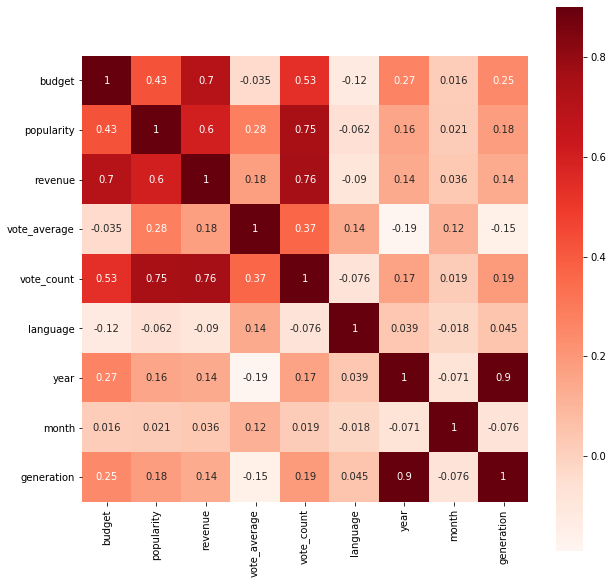

In [106]:
plt.subplots(figsize = (10, 10))

sns.heatmap(movies.corr(), annot = True, cmap = 'Reds', vmax = .9, square = True)

# 成本和票房之间的相关性很高，高成本电影更容易获得高票房
# 受欢迎程度越高，就会有更多的人给电影投票
# 票房越高，给电影投票的人也会更多
# 受欢迎程度和电影的票房有一定的关系
# 投票人数和电影成本也有一定的关系

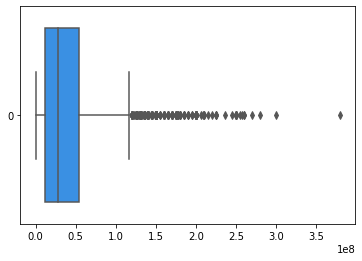

In [107]:
sns.boxplot(data = movies.budget, color = 'dodgerblue', orient = 'h')

# 成本跨度很大，但大多数电影的成本不算太高

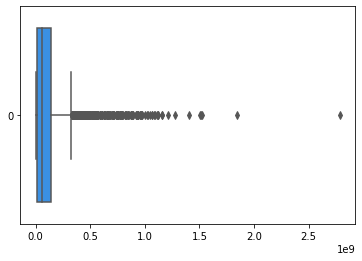

In [108]:
sns.boxplot(data = movies.revenue, color = 'dodgerblue', orient = 'h')

# 电影票房差别同样很大 基本集中在0.0 到0.5-1.0的范围内

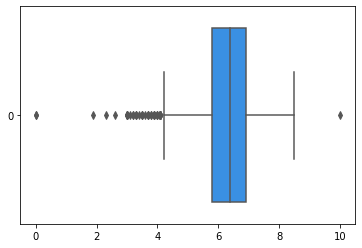

In [109]:
sns.boxplot(data = movies.vote_average, color = 'dodgerblue', orient = 'h')

# 大部分电影的投票分数都集中在6-7之间
# 满分电影为Dancer, Texas Pop. 81
# Mi America, Naturally Native无人投票 vote_average == 0

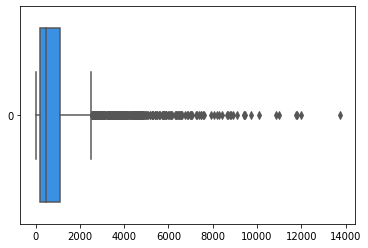

In [110]:
sns.boxplot(data = movies.vote_count, color = 'dodgerblue', orient = 'h')

# 大多数电影的投票人数比较少 极差大

In [111]:
movies.sort_values('vote_count', ascending = False).head(5)

# 经典电影投票人数更多

,budget,original_language,movie_title,popularity,revenue,vote_average,vote_count,actors,director,language,year,month,generation,main_country,main_genre,main_company
96,160000000,en,Inception,167.583710,825532764,8.1,13752,"['Leonardo DiCaprio', 'Joseph Gordon-Levitt', ...",Christopher Nolan,0,2010,7,5,United_Kingdom,Action,Legendary_Pictures
65,185000000,en,The Dark Knight,187.322927,1004558444,8.2,12002,"['Christian Bale', 'Heath Ledger', 'Aaron Eckh...",Christopher Nolan,0,2008,7,5,United_Kingdom,Drama,DC_Comics
0,237000000,en,Avatar,150.437577,2787965087,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...",James Cameron,0,2009,12,5,United_States_of_America,Action,Ingenious_Film_Partners
16,220000000,en,The Avengers,144.448633,1519557910,7.4,11776,"['Robert Downey Jr.', 'Chris Evans', 'Mark Ruf...",Joss Whedon,0,2012,4,6,United_States_of_America,Science_Fiction,Paramount_Pictures
788,58000000,en,Deadpool,514.569956,783112979,7.4,10995,"['Ryan Reynolds', 'Morena Baccarin', 'Ed Skrei...",Tim Miller,0,2016,2,6,United_States_of_America,Action,Twentieth_Century_Fox_Film_Corporation


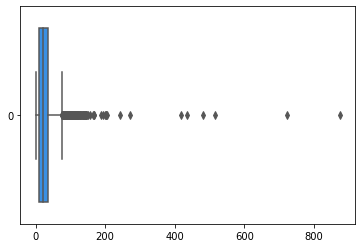

In [112]:
sns.boxplot(data = movies.popularity, color = 'dodgerblue', orient = 'h')

# 大多数电影的流行度集中在100-200，极少数电影的流行度极高
# 流行度最高的是Minions 小黄人

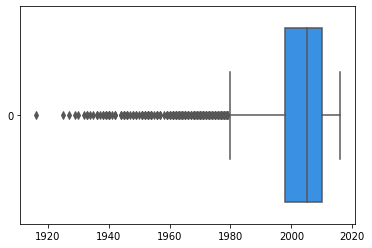

In [113]:
sns.boxplot(data = movies.year, color = 'dodgerblue', orient = 'h')

# 该数据的电影主要是1998-2011左右的

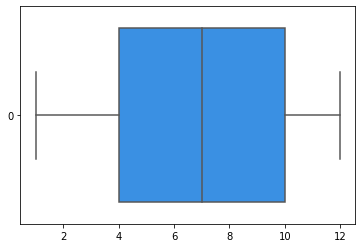

In [114]:
sns.boxplot(data = movies.month, color = 'dodgerblue', orient = 'h')

# 数据集中的电影主要是4-10月的
# 美国夏季档期：从每年5月下旬至9月4日为止，它的时间跨度长，又正值暑期，自然是所片商最为重视的档期。 【百度】
# 中国暑期档：一般泛指每年6月-9月的电影档期。 【百度】

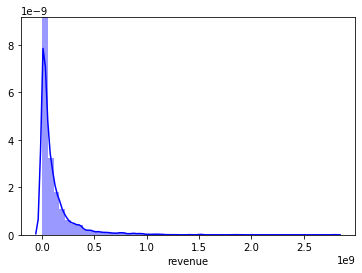

In [115]:
sns.distplot(movies['revenue'], kde = True, color = 'b')

# 绝大多数电影的票房较少

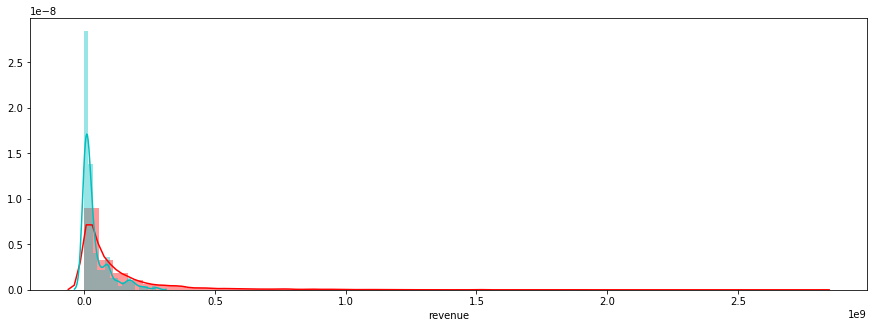

In [116]:
plt.subplots(figsize = (15, 5))

sns.distplot(movies[(movies.language == 0)]['revenue'], kde = True, color = 'r')
sns.distplot(movies[(movies.language == 1)]['revenue'], kde = True, color = 'c')

# 高票房电影依旧集中在英语电影上，非英语并且票房较低的电影的数量远高于英语电影
# 英语电影的放映范围更广，出口国家更多

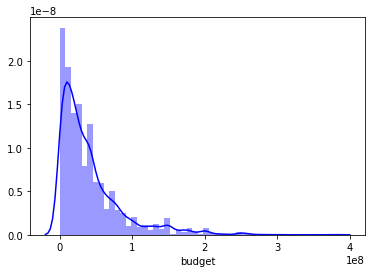

In [117]:
sns.distplot(movies['budget'], kde = True, color = 'b')

# 绝大多数电影的成本较少

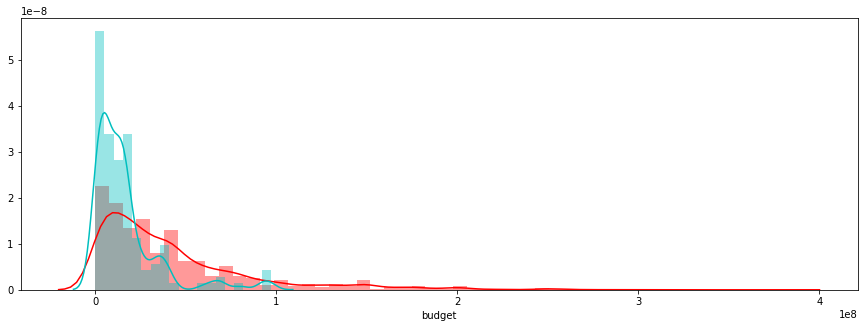

In [118]:
plt.subplots(figsize = (15, 5))

sns.distplot(movies[(movies.language == 0)]['budget'], kde = True, color = 'r')
sns.distplot(movies[(movies.language == 1)]['budget'], kde = True, color = 'c')

# 大多数英文电影的成本偏高，成本偏低的数量少于非英文电影 $\rightarrow$ 欧美国家大制作电影更多

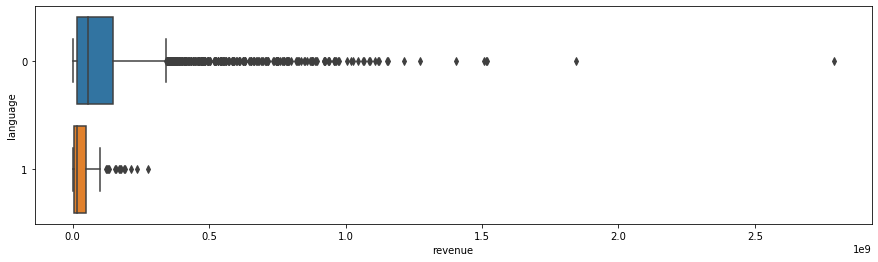

In [119]:
plt.subplots(figsize = (15, 4))

sns.boxplot(x = 'revenue', y = 'language', data = movies, orient = 'h')

# 验证上文 语言与票房的关系

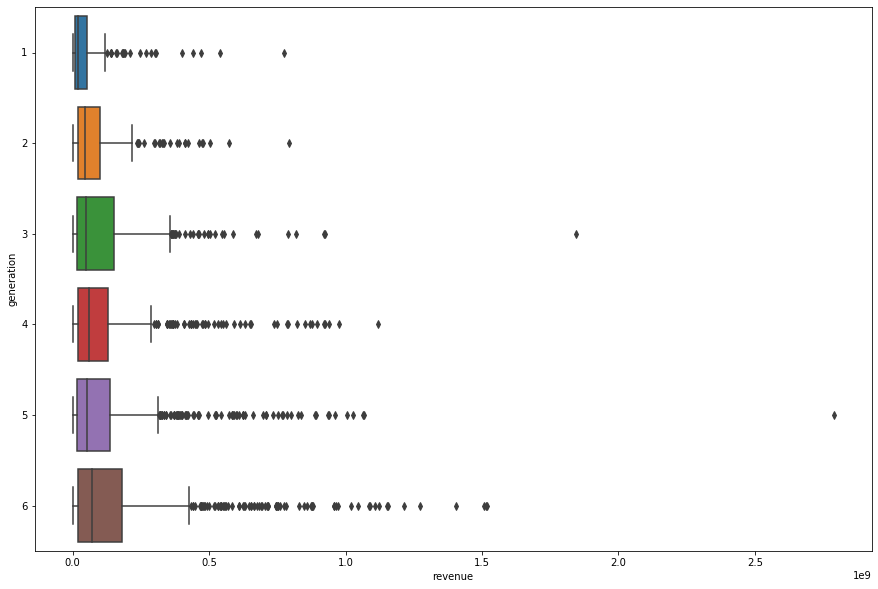

In [120]:
plt.subplots(figsize = (15, 10))

sns.boxplot(x = 'revenue', y = 'generation', data = movies, orient = 'h')

# 票房最高的电影为2005<=y<=10的Avatar，其次是1991<=y<=2000的Titanic
# 2011-2016的电影票房普遍偏高
# 总体来看电影票房呈增长趋势 //和经济增长与通货膨胀有一定关系？
# 人们的总体生活水平也决定了现在人们在电影等娱乐方面的支出有一定的增加

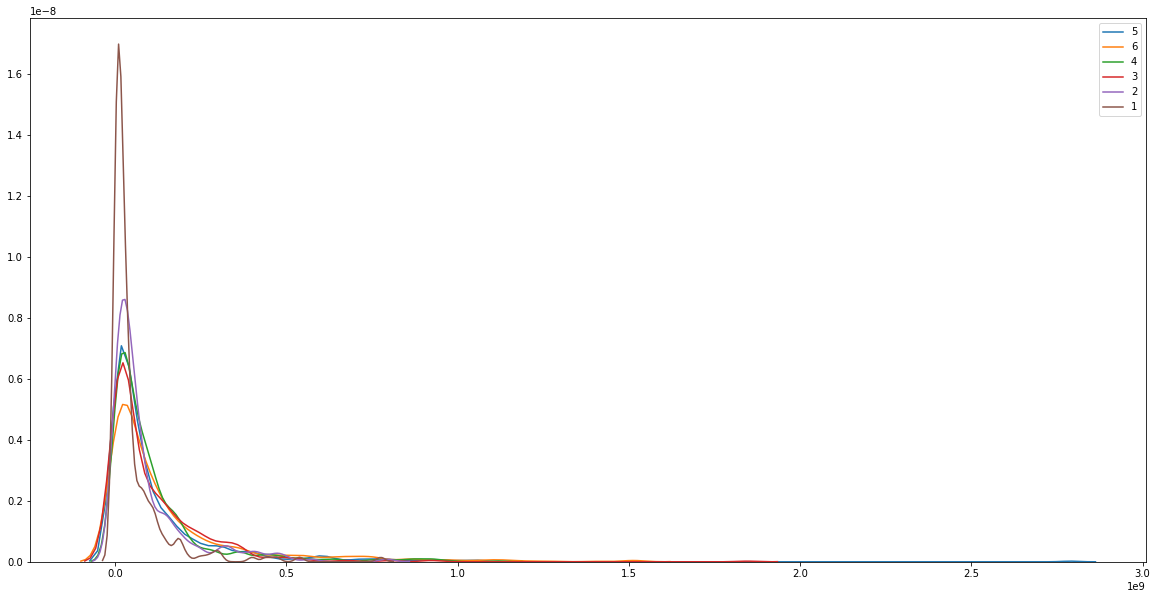

In [121]:
plt.subplots(figsize = (20, 10))

for i in movies.generation.unique():
    sns.kdeplot(movies.loc[movies['generation'] == i, 'revenue'], label = i)

# 各年代的电影票房分布基本一致

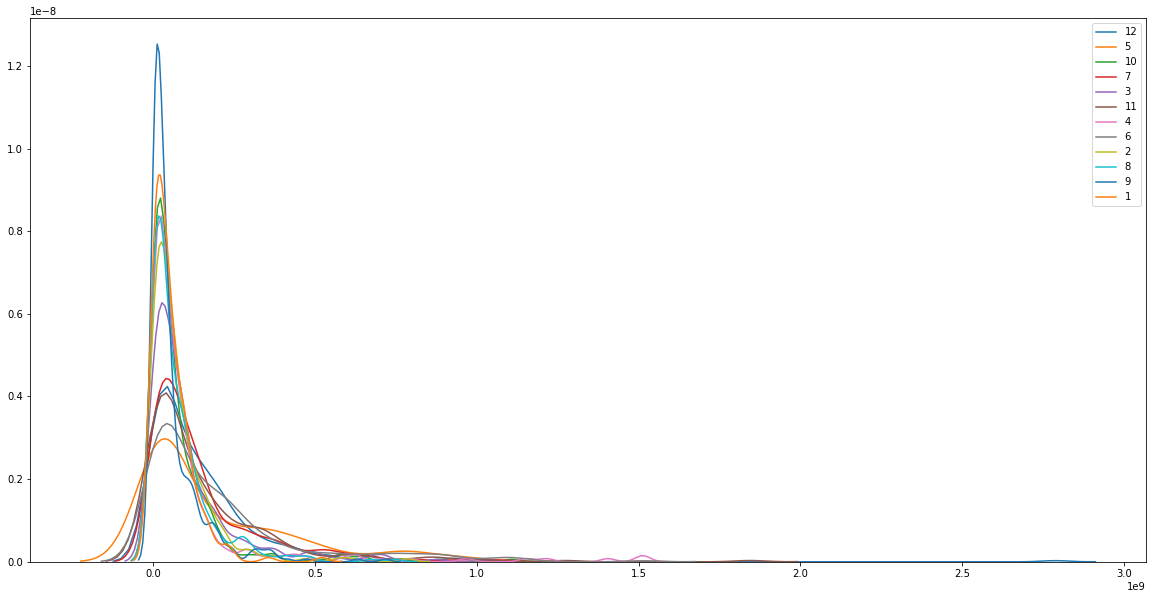

In [122]:
plt.subplots(figsize = (20, 10))

for i in movies.month.unique():
    sns.kdeplot(movies.loc[movies['month'] == i, 'revenue'], label = i)

# 每月份电影的分布特征基本一致：高票房较少 / 低票房较多
# 12月份电影数量明显多余其他月份 $\rightarrow$ 圣诞档 + 新年档
# 1月电影明显减少

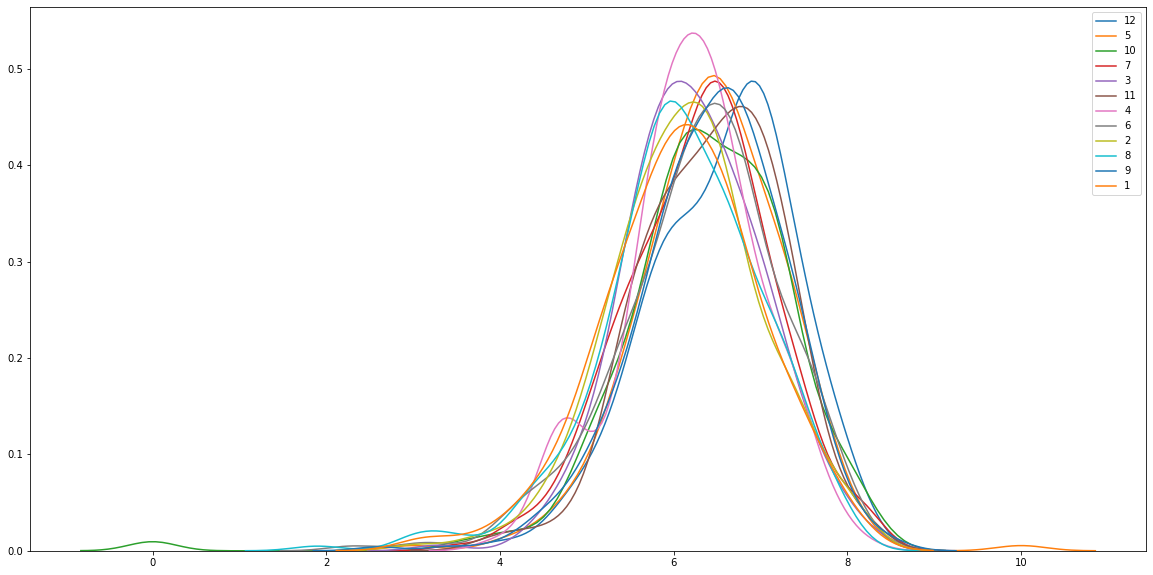

In [123]:
plt.subplots(figsize = (20, 10))

for i in movies.month.unique():
    sns.kdeplot(movies.loc[movies['month'] == i, 'vote_average'], label = i)

# 月份于电影评分的关系不大
# 4月电影的评分人数会多一点
# 9月电影的评分稍微高一点

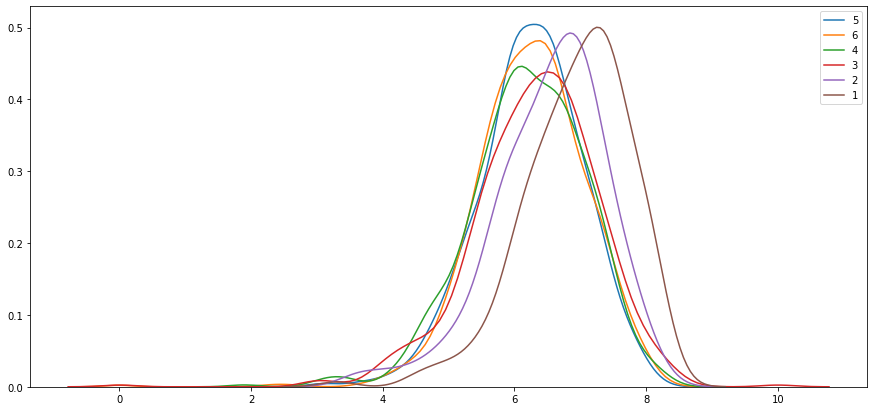

In [124]:
plt.subplots(figsize = (15, 7))

for i in movies.generation.unique():
    sns.kdeplot(movies.loc[movies['generation'] == i, 'vote_average'], label = i)

# 老电影的评分总体偏高
# 评分总体趋势基本一致

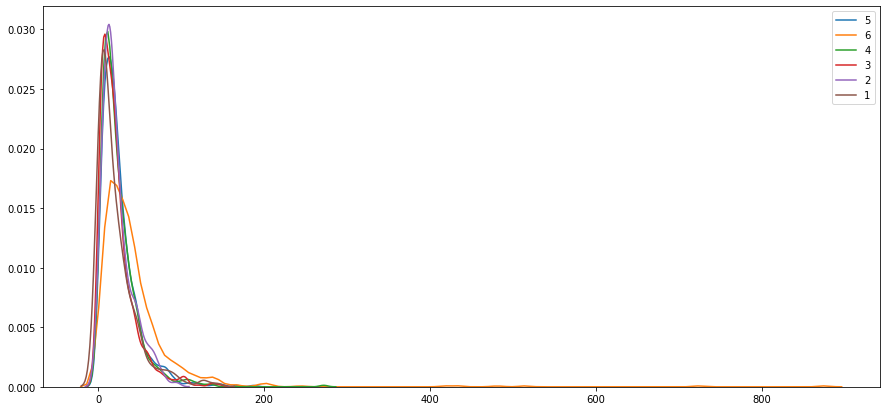

In [125]:
plt.subplots(figsize = (15, 7))

for i in movies.generation.unique():
    sns.kdeplot(movies.loc[movies['generation'] == i, 'popularity'], label = i)

# 分布基本一致，更老的电影的popularity反而会高一点

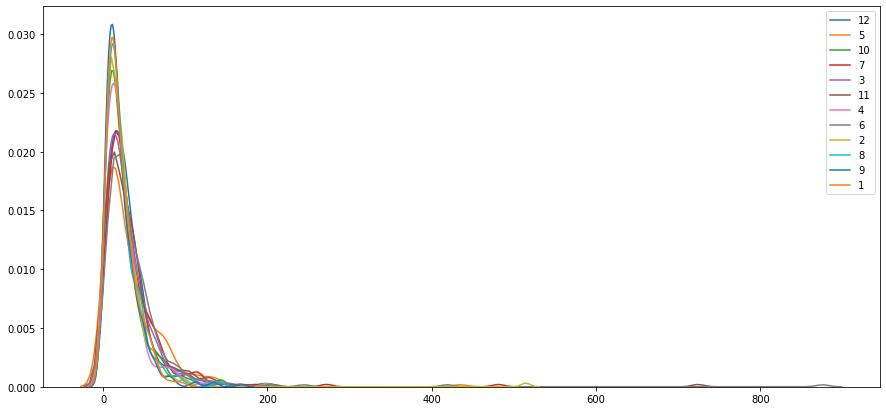

In [126]:
plt.subplots(figsize = (15, 7))

for i in movies.month.unique():
    sns.kdeplot(movies.loc[movies['month'] == i, 'popularity'], label = i)

# 12月流行度较低的最多，1月的流行度低的是最少的
# 没有特定的“流行月份”

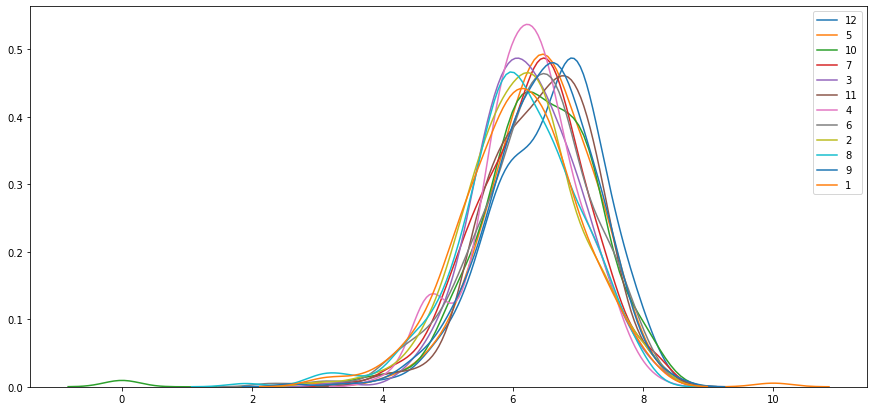

In [127]:
plt.subplots(figsize = (15, 7))

for i in movies.month.unique():
    sns.kdeplot(movies.loc[movies['month'] == i, 'vote_average'], label = i)

# 4月的低分电影最多 5分左右有一个小的峰值
# 12月电影的评分偏高
# 分布趋势基本相同
# 1月电影评分较少

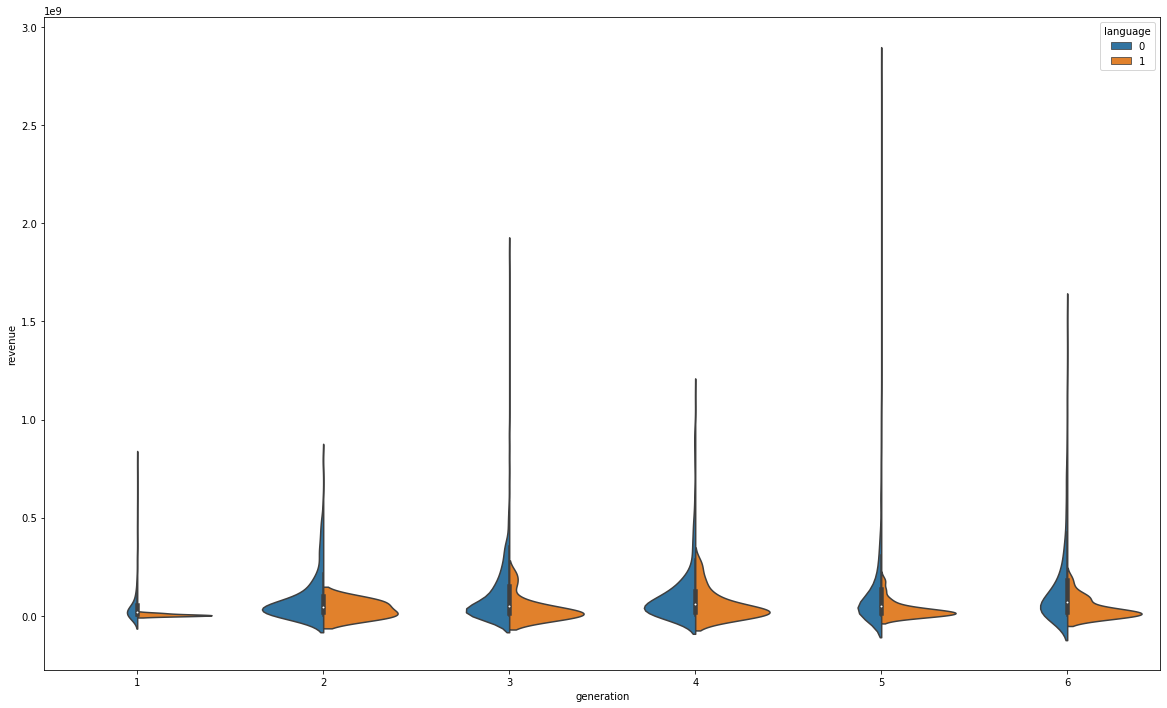

In [128]:
plt.subplots(figsize = (20, 12))

sns.violinplot(x = 'generation', y = 'revenue', hue = 'language', data = movies, split = True)

# 不同年代非英语电影票房的分布情况类似，大多数集中在较低的部分 $\rightarrow$ 跟数据集本身的收集应该也有一定的关系
# 票房较低的部分，除了在1981-1990里英语及非英语数量基本相同，英语电影的数量普遍小于非英语电影

In [129]:
movies.groupby('main_genre').sum()

,budget,popularity,revenue,vote_average,vote_count,language,year,month,generation
main_genre,,,,,,,,,
Action,34731807904,20500.588733,91828714632,3622.8,755174,26,1193351,3865,2521
Adventure,21853142979,12913.024269,71469472219,1859.2,485141,12,581884,2120,1140
Animation,8218802711,4142.504174,29728937981,630.0,159709,5,196534,704,471
Comedy,18811590286,13282.942702,53850992855,4010.0,393546,12,1321884,4457,2828
Crime,4011152490,3593.421645,9424132125,954.3,116788,6,288182,958,584
Documentary,354470940,229.681038,736857017,202.0,4317,3,58129,195,128
Drama,21109881411,17248.400627,54722242907,5170.4,550427,50,1550661,5927,3235
Family,2392185179,1976.295231,8927422804,238.6,42000,1,78195,275,178
Fantasy,6097179547,3811.496352,17264430290,605.1,127198,8,194285,646,415


movies.groupby('main_genre').sum()

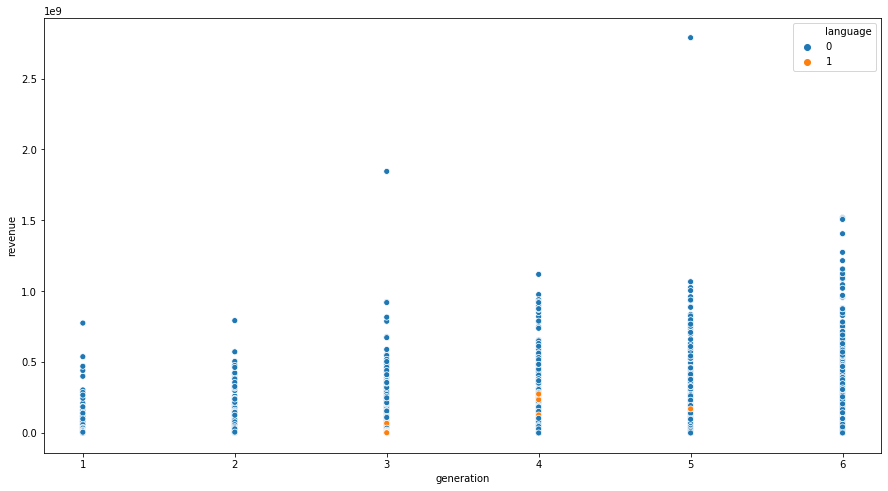

In [130]:
plt.subplots(figsize = (15, 8))

sns.scatterplot(x = 'generation', y = 'revenue', hue = 'language', data = movies)

# 验证上文得出的分布结论

In [131]:
from scipy import stats

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


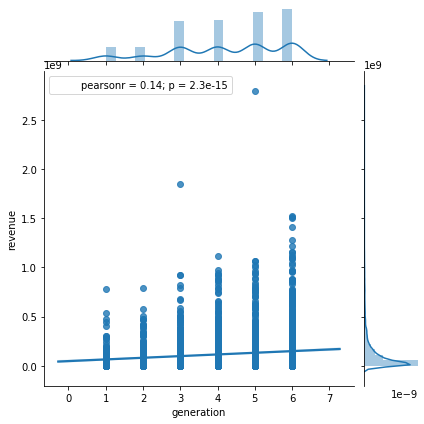

In [132]:
g = sns.jointplot(x = 'generation', y = 'revenue', data = movies, kind = 'reg')
g.annotate(stats.pearsonr)

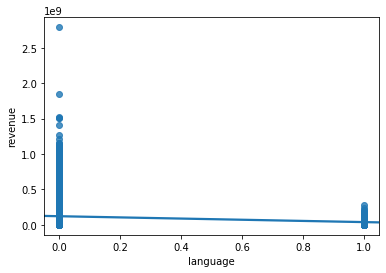

In [133]:
sns.regplot(x = 'language', y = 'revenue', data = movies)

# 英语类票房普遍偏高

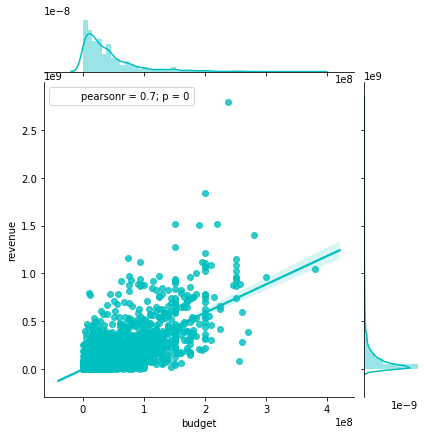

In [134]:
g = sns.jointplot(x = 'budget', y = 'revenue', data = movies, kind = 'reg', color = 'c')
g.annotate(stats.pearsonr)

# 电影成本和票房相关程度高
# 总体来说成本越高的电影票房也就越高

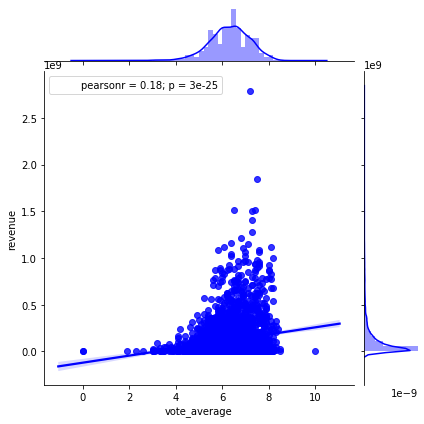

In [135]:
g = sns.jointplot(x = 'vote_average', y = 'revenue', data = movies, kind = 'reg', color = 'b')
g.annotate(stats.pearsonr)

# 分布较为平均 相关性不大

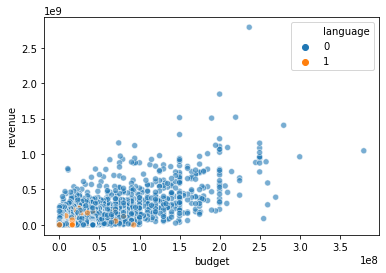

In [136]:
sns.scatterplot(x = 'budget', y = 'revenue', hue = 'language', data = movies, alpha = .6)

# 非英文电影整体较少，并且成本及票房较低

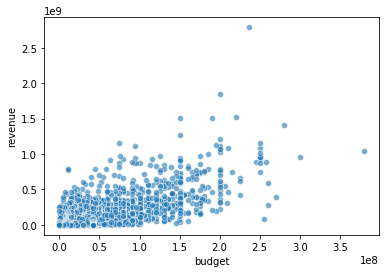

In [137]:
sns.scatterplot(x = 'budget', y = 'revenue', data = movies[movies.language == 0], alpha = .6)

# 英语电影成本票房分布较均匀，存在成本较高且票房很高的情况

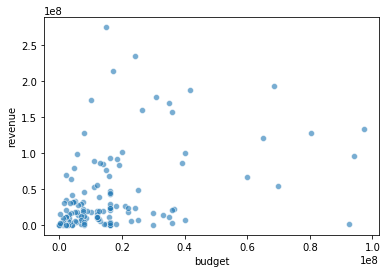

In [138]:
sns.scatterplot(x = 'budget', y = 'revenue', data = movies[movies.language == 1], alpha = .6)

# 非英语电影存在成本低但票房高的，且极少存在成本高票房高的
# 大部分成本低，票房低

In [139]:
# 尝试建立新的dataframe 关于每类电影的票房平均值

genres = []
for g in movies.main_genre.unique():
    genres.append(g)

genMean = []
for g in genres:
    gmean = movies[(movies.main_genre == g)].revenue.mean()
    genMean.append(gmean)

genDict = dict(zip(genres, genMean))
genData = pd.DataFrame(genDict, index = [0])
genData = genData.T.reset_index().rename(columns = {'index' : 'genres', 0 : 'meanRevenue'})

genData.head()

,genres,meanRevenue
0,Action,1.540750e+08
1,Adventure,2.455996e+08
2,Fantasy,1.779838e+08
3,Animation,3.033565e+08
4,Science_Fiction,1.997302e+08


In [140]:
# 尝试建立新的dataframe 关于每类电影的平均评分

genres = []
for g in movies.main_genre.unique():
    genres.append(g)

voteMean = []
for g in genres:
    vmean = movies[(movies.main_genre == g)].vote_average.mean()
    voteMean.append(vmean)

voteDict = dict(zip(genres,voteMean))
voteData = pd.DataFrame(voteDict, index = [0])
voteData = voteData.T.reset_index().rename(columns = {'index' : 'genres', 0 : 'meanVote'})

voteData.head()

,genres,meanVote
0,Action,6.078523
1,Adventure,6.389003
2,Fantasy,6.238144
3,Animation,6.428571
4,Science_Fiction,6.307407


In [141]:
# 尝试建立新的dataframe 关于每类电影的平均成本

genres = []
for g in movies.main_genre.unique():
    genres.append(g)

budgetMean = []
for g in genres:
    bmean = movies[(movies.main_genre == g)].budget.mean()
    budgetMean.append(bmean)

budgetDict = dict(zip(genres,budgetMean))
budgetData = pd.DataFrame(budgetDict, index = [0])
budgetData = budgetData.T.reset_index().rename(columns = {'index' : 'genres', 0 : 'meanbudget'})


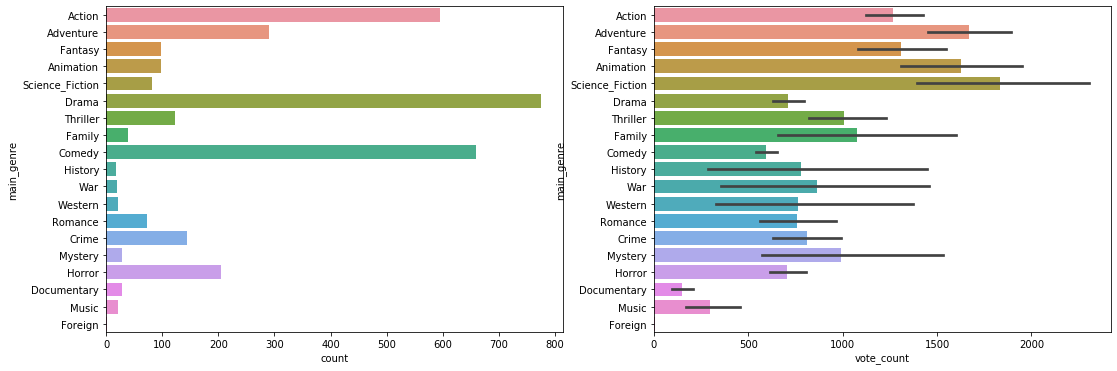

In [142]:
plt.subplots(figsize = (18, 6))

# 数据集的每类电影分布
plt.subplot(1,2,1)
sns.countplot(y = 'main_genre', data = movies)

# 投票人数
plt.subplot(1,2,2)
sns.barplot(y = 'main_genre', x = 'vote_count', data = movies)


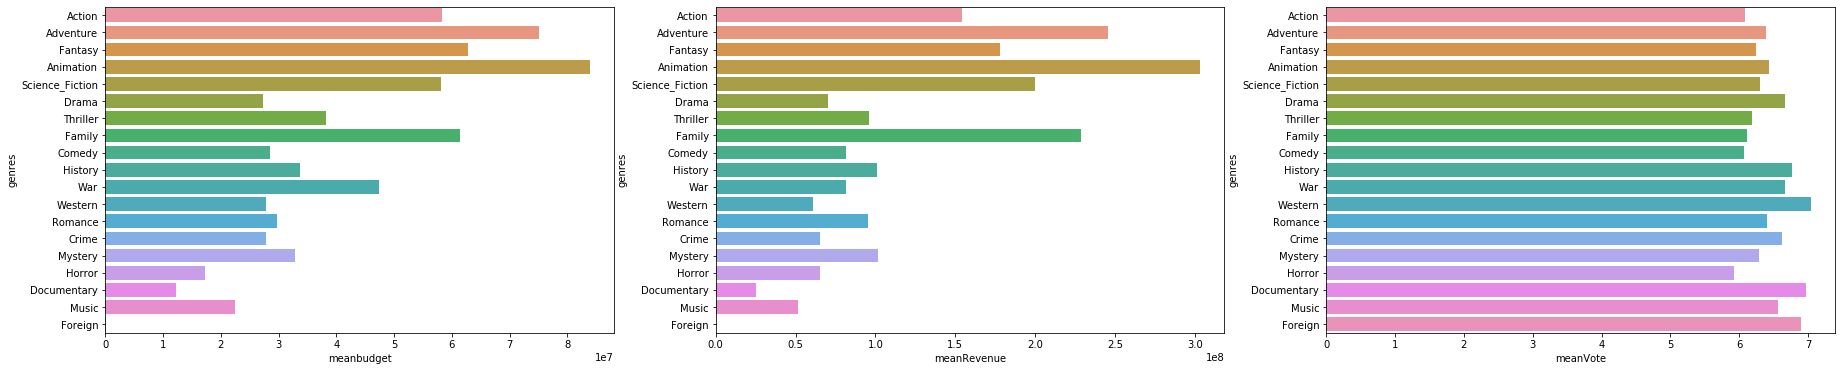

In [143]:
plt.subplots(figsize = (31, 6))

# 每类电影的平均成本比较
plt.subplot(1,3,1)
sns.barplot(y = 'genres', x = 'meanbudget', data = budgetData)

# 每类电影的平均票房比较
plt.subplot(1,3,2)
sns.barplot(y = 'genres', x = 'meanRevenue', data = genData)

# 每类电影的平均评分比较
plt.subplot(1,3,3)
g = sns.barplot(y = 'genres', x = 'meanVote', data = voteData)

# 成本前三 Animation Adventure Fantacy
# 成本后三 Foreign Documentary Horror
# 票房前三 Animation Adventure Family
# 票房后三 Documentary Foreign Horror
# 评分前三 Foreign Documentary Western
# 评分后三 Horror Comedy Family

1. 进行原始数据探索与分析，并且给出自己的见解。
    - 数据集本身英文电影较多，分析之后不能将结果完全应用于非英文电影
    - 电影本身数据时间跨度大，所给的票房/成本数据和经济因素也有一定的影响
    - 数据集的每类电影数据量差异较大，可能造成偏差
    
2. 什么样的电影最受欢迎呢？ 
    - Western Documentary Drama Foreign评分较高
        - 除了Drama，其他评分人数较少，不能完全作为参照
    - 没有特定的流行月份
    - Animation Adventure Family 票房最高
    
3. 通过可视化探索来探讨受众喜好与电影那些因素有关？并说明原因。 
    - 目前看来可能于电影种类有一定的关系
    - 从heatmap上的相关性系数来看，还没有找到关系很大的
    
4. 对重要的特征进行清理和预处理。 
    - 提取了年份和月份，也提取了主要的国家，制片公司
    
<!-- 5. 应用机器学习工具来预测不同电影的票房收入。  -->

6. 如果你是一个制片人，导演，编剧，你会如何努力的去创作一部深受当下影迷热捧的高票房电影？
    - 总体看来Action Science_Fiction票房更高
    - 英文电影的票房总体来说比非英语电影的票房高
    

In [144]:
# 战争电影分析

warMovies = movies.loc[movies.main_genre == 'War']

战争电影分析
    - 评分 流行度 票房 成本分布特征比较一致 趋势相同
    - 成本高的票房不一定高
    - 票房成本流行度低的分数不一定低

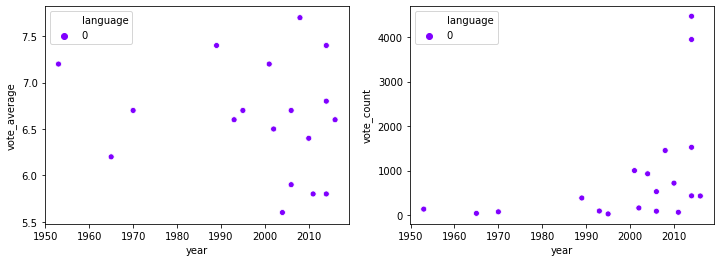

In [169]:
plt.subplots(figsize = (12, 4))

plt.subplot(1,2,1)
sns.scatterplot(x = 'year', y = 'vote_average', hue = 'language', data = warMovies, palette = 'rainbow')

plt.subplot(1,2,2)
sns.scatterplot(x = 'year', y = 'vote_count', hue = 'language', data = warMovies, palette = 'rainbow')

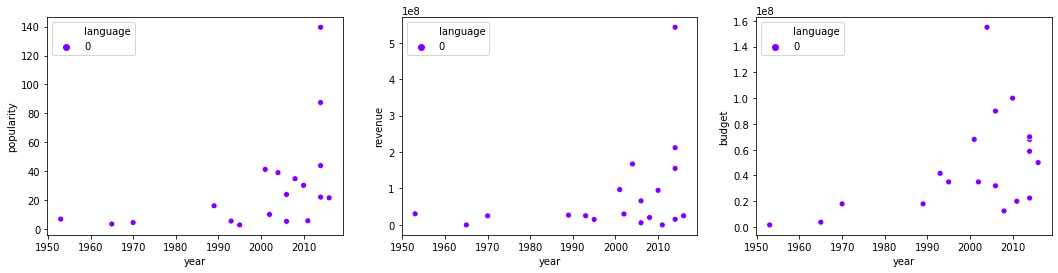

In [170]:
plt.subplots(figsize = (18, 4))

plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'popularity', hue = 'language', data = warMovies, palette = 'rainbow')

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'revenue', hue = 'language', data = warMovies, palette = 'rainbow')

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'budget', hue = 'language', data = warMovies, palette = 'rainbow')

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


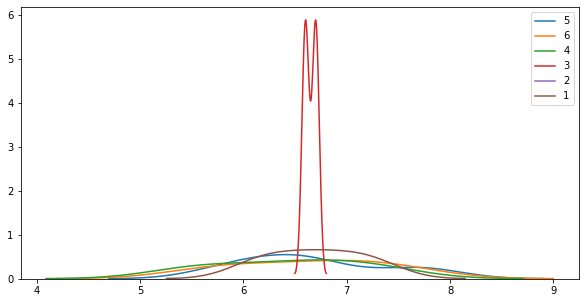

In [147]:
# 战争类电影的评分分析

plt.subplots(figsize = (10, 5))

for i in movies.generation.unique():
    sns.kdeplot(warMovies.loc[movies['generation'] == i, 'vote_average'], label = i)

plt.legend()

# 即使战争片本身只有19部 generation 3(91-00)的战争片最多 评分有两个峰值

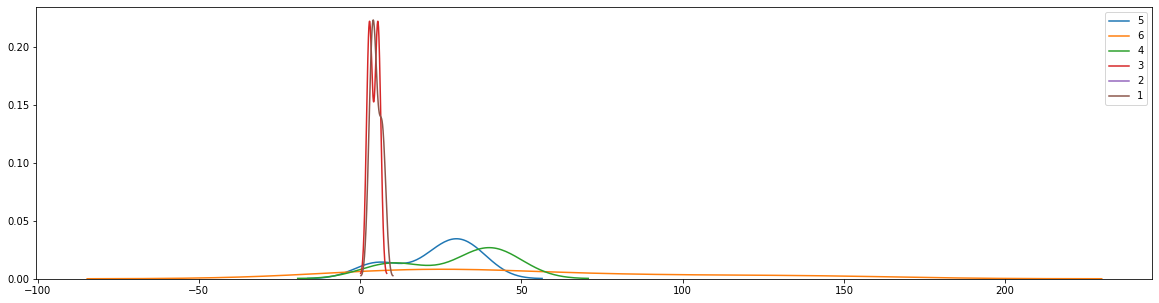

In [148]:
# 战争类电影的流行度分析

plt.subplots(figsize = (20, 5))

for i in movies.generation.unique():
    sns.kdeplot(warMovies.loc[movies['generation'] == i, 'popularity'], label = i)

# 90-00 <=80的战争电影数量最多 但流行度普遍不高 // 结合上文 小众但受欢迎
# 90-00 流行度呈现双峰分布
# <=80 流行度单峰分布
# 基本上来说 电影越新流行度就越高 除去06-10 00-05 
# 11-16 战争电影流行程度跨度很大 甚至有很多不流行的 分布比较平均

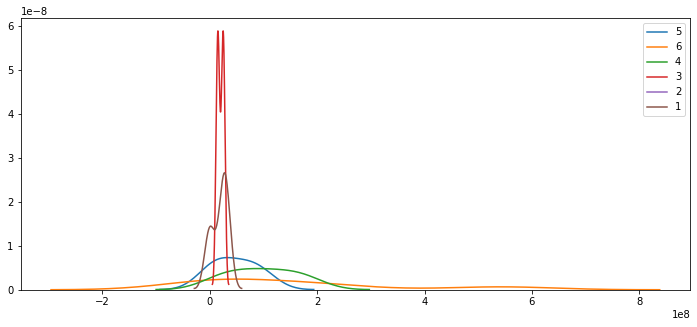

In [149]:
# 战争类电影的票房分析

plt.subplots(figsize = (12, 5))

for i in movies.generation.unique():
    sns.kdeplot(warMovies.loc[movies['generation'] == i, 'revenue'], label = i)
    
# 91-00的电影票房依旧是在较低区域双峰分布 
# 最新11-16战争电影票房跨度很大，票房最高的也是在这个区间
# <= 80的票房也比较低


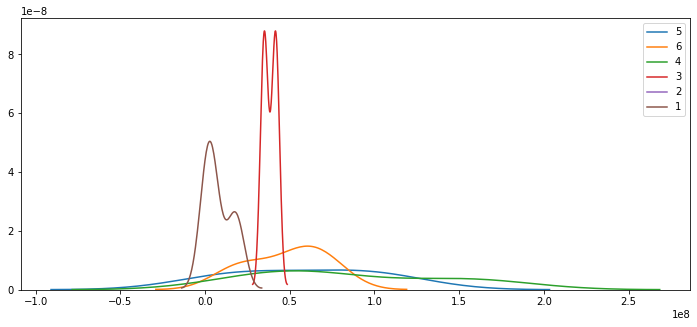

In [150]:
# 战争类电影的成本分析

plt.subplots(figsize = (12, 5))

for i in movies.generation.unique():
    sns.kdeplot(warMovies.loc[movies['generation'] == i, 'budget'], label = i)
    
# 11-16的电影成本没有00-05 06-10的高

In [151]:
# Animation电影子集

aniMovies = movies.loc[movies.main_genre == 'Animation']

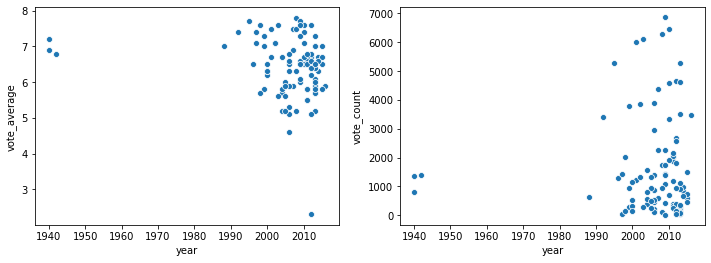

In [152]:
plt.subplots(figsize = (12, 4))

plt.subplot(1,2,1)
sns.scatterplot(x = 'year', y = 'vote_average', data = aniMovies)

plt.subplot(1,2,2)
sns.scatterplot(x = 'year', y = 'vote_count', data = aniMovies)

# 近10年才出现很多animation类电影
# 大多数分数较高 5分以上 存在评分极低的情况
# Foodfight! 投票分数最低2.3 且投票人数较少28
# Up投票人数最多6870

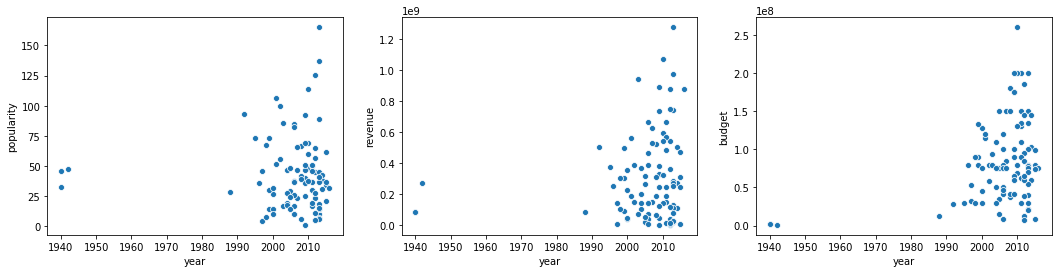

In [153]:
plt.subplots(figsize = (18, 4))

plt.subplot(1,3,1)
sns.scatterplot(x = 'year', y = 'popularity', data = aniMovies)

plt.subplot(1,3,2)
sns.scatterplot(x = 'year', y = 'revenue', data = aniMovies)

plt.subplot(1,3,3)
sns.scatterplot(x = 'year', y = 'budget', data = aniMovies)

# popularity revenue 分布情况基本一致

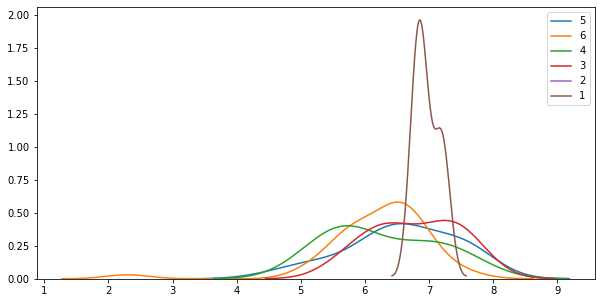

In [154]:
# 动画类电影的评分分析

plt.subplots(figsize = (10, 5))

for i in movies.generation.unique():
    sns.kdeplot(aniMovies.loc[movies['generation'] == i, 'vote_average'], label = i)

plt.legend()

# 老动画评分高的较多 // 老动画本身数量很少
# 91-20 动画电影平均评分较高 分布在5-9之间
# 01-05 5-6之间的动画电影更多

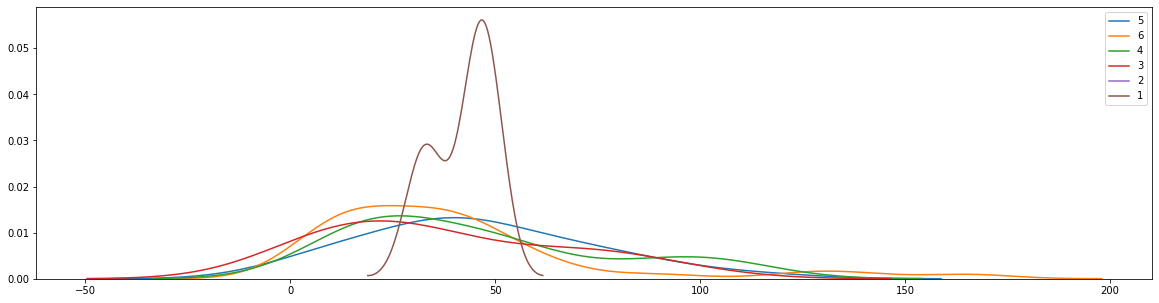

In [155]:
# 动画类电影的流行度分析

plt.subplots(figsize = (20, 5))

for i in movies.generation.unique():
    sns.kdeplot(aniMovies.loc[movies['generation'] == i, 'popularity'], label = i)
    
# 流行度最高的在11-16 其次是01-05
# 11-16流行度低的也很多 基本可以看作是第一多 // 考虑到<=80的数量

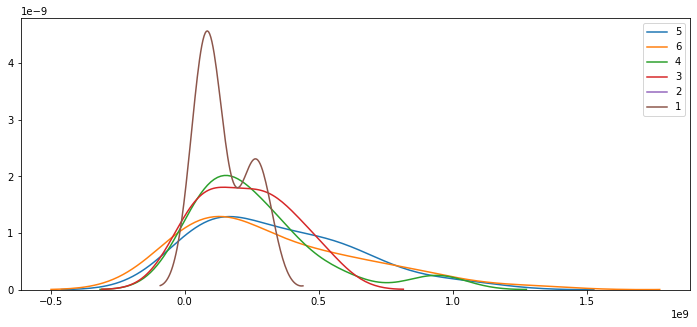

In [156]:
# 动画类电影的票房分析

plt.subplots(figsize = (12, 5))

for i in movies.generation.unique():
    sns.kdeplot(aniMovies.loc[movies['generation'] == i, 'revenue'], label = i)
    
# 票房最高最高的出现在11-16
# 06-10 票房普遍偏高

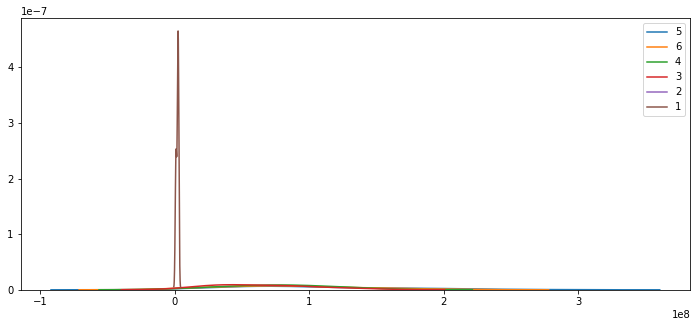

In [157]:
# 动画类电影的成本分析

plt.subplots(figsize = (12, 5))

for i in movies.generation.unique():
    sns.kdeplot(aniMovies.loc[movies['generation'] == i, 'budget'], label = i)
    
# 除了<=80分布情况基本一致
# 最高的出现在06-10

In [158]:
# Action电影子集

actMovies = movies.loc[movies.main_genre == 'Action']

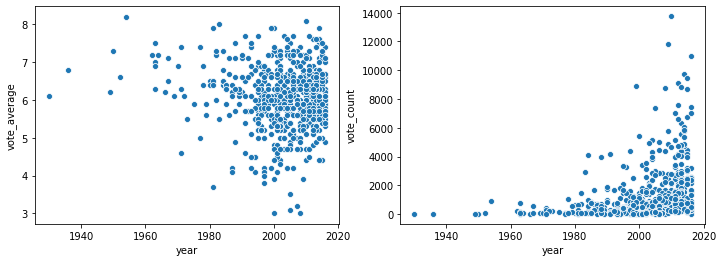

In [159]:
plt.subplots(figsize = (12, 4))

plt.subplot(1,2,1)
sns.scatterplot(x = 'year', y = 'vote_average', data = actMovies)

plt.subplot(1,2,2)
sns.scatterplot(x = 'year', y = 'vote_count', data = actMovies)

